# Pasang Paket yang Diperllukan Kemudian di Import

In [2]:
!pip install google-play-scraper
!pip install nltk
!pip install seaborn
!pip install Sastrawi
!pip install wordcloud
!pip3 install wordcloud
!pip install xgboost
!pip install scikit-learn
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
from google_play_scraper import app
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nurchoir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nurchoir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Melakukan Scraping Data dari GooglePlay Store

In [5]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
'com.gojek.app', #Nama Aplikasi di link GooglePlay
lang='id', #id kode negara indonesia
country='id',
sort=Sort.NEWEST, #Mengurutkan terbaru, Sort.MOST_ RELEVAN untuk mengurutkan paling relevan
count=300, # Jumlah Data yang diambil
filter_score_with=None
)

In [6]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
scrappeddata1 = data[['content','score','at','appVersion']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=True) #Mengurutkan terlama, ganti false untuk mengurutkan dari terbaru 

In [7]:
sorteddata['Year'] = sorteddata['at'].dt.year
sorteddata['Month'] = sorteddata['at'].dt.month
sorteddata['Day'] = sorteddata['at'].dt.day
sorteddata

,content,score,at,appVersion,Year,Month,Day
299,Srh update aplikasi..pas dah di update hrs mas...,4,2024-06-30 16:25:49,4.74.3,2024,6,30
298,pake gojek buat gofood aja krna bnyk diskonnya...,5,2024-06-30 16:31:07,4.89.1,2024,6,30
297,Thanks gojek,5,2024-06-30 16:32:28,4.89.1,2024,6,30
296,"Sekarang driver pada jual mahal, customer paka...",1,2024-06-30 16:35:19,4.89.1,2024,6,30
295,Di tawari paylater sama pijaman tapi gk pernah...,1,2024-06-30 16:45:43,None,2024,6,30
...,...,...,...,...,...,...,...
4,"Saya bingung, limit pay later sering dinaikkan...",2,2024-07-01 17:24:42,4.89.1,2024,7,1
3,Pelayanan baik,5,2024-07-01 17:24:44,4.86.2,2024,7,1
2,PERFECT,5,2024-07-01 17:27:42,4.89.1,2024,7,1
1,Kasih tau driver kalian itu.. Kalo masuk ke ar...,1,2024-07-01 17:34:22,4.89.1,2024,7,1


In [8]:
df = sorteddata[['content','score','Year','Month','Day']]

In [9]:
df['score'].value_counts() #menghitung jumlah berdasarkan score/rating

score
5    181
1     79
4     16
2     14
3     10
Name: count, dtype: int64

<Axes: xlabel='score'>

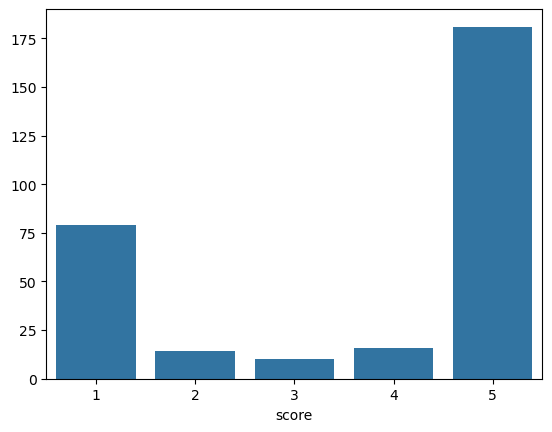

In [10]:
import seaborn as sns
result = df.groupby(['score']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

# Pelabelan

In [12]:
sentimen = []
for index, row in df.iterrows():
    if row['score'] > 3 :
        sentimen.append('Positif')
    elif row['score'] == 3:
        sentimen.append('Netral')
    else:
        sentimen.append('Negatif')
df['sentiment'] = sentimen
df

C:\Users\Nurchoir\AppData\Local\Temp\ipykernel_3596\794691113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = sentimen


,content,score,Year,Month,Day,sentiment
299,Srh update aplikasi..pas dah di update hrs mas...,4,2024,6,30,Positif
298,pake gojek buat gofood aja krna bnyk diskonnya...,5,2024,6,30,Positif
297,Thanks gojek,5,2024,6,30,Positif
296,"Sekarang driver pada jual mahal, customer paka...",1,2024,6,30,Negatif
295,Di tawari paylater sama pijaman tapi gk pernah...,1,2024,6,30,Negatif
...,...,...,...,...,...,...
4,"Saya bingung, limit pay later sering dinaikkan...",2,2024,7,1,Negatif
3,Pelayanan baik,5,2024,7,1,Positif
2,PERFECT,5,2024,7,1,Positif
1,Kasih tau driver kalian itu.. Kalo masuk ke ar...,1,2024,7,1,Negatif


<Axes: xlabel='sentiment'>

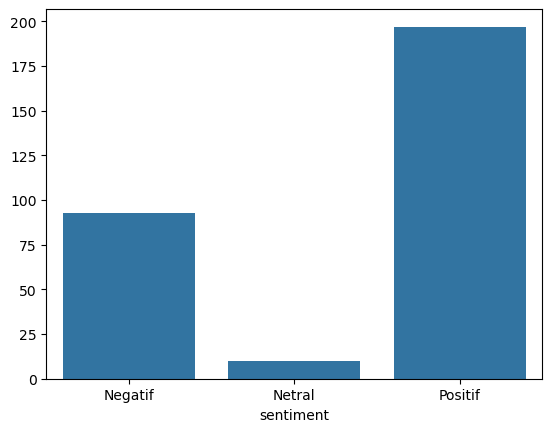

In [13]:
df_new = df[['Year', 'Month', 'sentiment']]
result = df_new.groupby(['sentiment']).size()
# Pengambaran Hasil
sns.barplot(x = result.index, y = result.values)

Text(0.5, 1.0, 'Pembagian Sentimen')

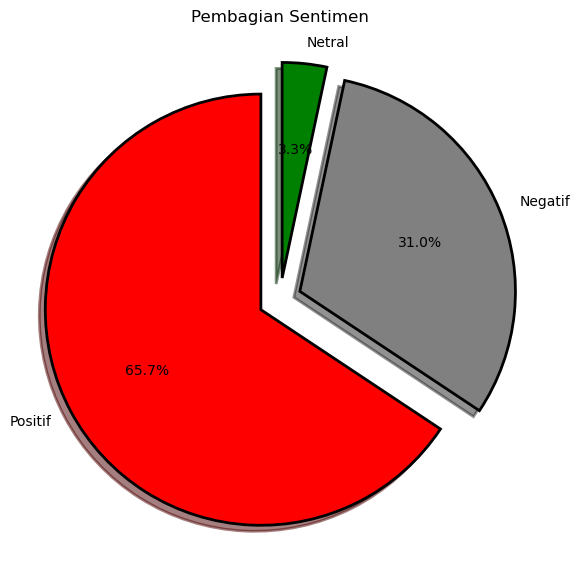

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
colors = ('red', 'grey', 'green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_new['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Pembagian Sentimen')

In [15]:
df3 = df_new.groupby(['Year','sentiment'])['sentiment'].count() #menghitung sentimen
df3

Year  sentiment
2024  Negatif       93
      Netral        10
      Positif      197
Name: sentiment, dtype: int64

# Tokenizing, Filtering & Stemming

In [17]:
from nltk.tokenize import sent_tokenize, word_tokenize
df['content_token'] = df['content'].apply(lambda x: word_tokenize(x))

In [18]:
from nltk.corpus import stopwords
# Make a list of Indonesian stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")
# Extend the list with your own custom stopwords
my_stopwords = ['gojek']
stopwords.extend(my_stopwords)
# Remove stopwords
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [19]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df

,content,score,Year,Month,Day,sentiment,content_token,stemmed
299,Srh update aplikasi..pas dah di update hrs mas...,4,2024,6,30,Positif,"[Srh, update, aplikasi, .., pas, dah, update, ...","[srh, update, aplikasi, , pas, dah, update, hr..."
298,pake gojek buat gofood aja krna bnyk diskonnya...,5,2024,6,30,Positif,"[pake, gofood, aja, krna, bnyk, diskonnya, ..,...","[pake, gofood, aja, krna, bnyk, diskon, , toppp]"
297,Thanks gojek,5,2024,6,30,Positif,[Thanks],[thanks]
296,"Sekarang driver pada jual mahal, customer paka...",1,2024,6,30,Negatif,"[Sekarang, driver, jual, mahal, ,, customer, p...","[sekarang, driver, jual, mahal, , customer, pa..."
295,Di tawari paylater sama pijaman tapi gk pernah...,1,2024,6,30,Negatif,"[Di, tawari, paylater, pijaman, gk, klau, gk, ...","[di, tawar, paylater, pijaman, gk, klau, gk, m..."
...,...,...,...,...,...,...,...,...
4,"Saya bingung, limit pay later sering dinaikkan...",2,2024,7,1,Negatif,"[Saya, bingung, ,, limit, pay, later, dinaikka...","[saya, bingung, , limit, pay, later, naik, , t..."
3,Pelayanan baik,5,2024,7,1,Positif,[Pelayanan],[layan]
2,PERFECT,5,2024,7,1,Positif,[PERFECT],[perfect]
1,Kasih tau driver kalian itu.. Kalo masuk ke ar...,1,2024,7,1,Negatif,"[Kasih, tau, driver, .., Kalo, masuk, area, or...","[kasih, tau, driver, , kalo, masuk, area, oran..."


In [20]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df

,content,score,Year,Month,Day,sentiment,content_token,stemmed,text_string
299,Srh update aplikasi..pas dah di update hrs mas...,4,2024,6,30,Positif,"[Srh, update, aplikasi, .., pas, dah, update, ...","[srh, update, aplikasi, , pas, dah, update, hr...",update aplikasi update masukin email gilir kli...
298,pake gojek buat gofood aja krna bnyk diskonnya...,5,2024,6,30,Positif,"[pake, gofood, aja, krna, bnyk, diskonnya, ..,...","[pake, gofood, aja, krna, bnyk, diskon, , toppp]",pake gofood krna bnyk diskon toppp
297,Thanks gojek,5,2024,6,30,Positif,[Thanks],[thanks],thanks
296,"Sekarang driver pada jual mahal, customer paka...",1,2024,6,30,Negatif,"[Sekarang, driver, jual, mahal, ,, customer, p...","[sekarang, driver, jual, mahal, , customer, pa...",sekarang driver jual mahal customer pakai prom...
295,Di tawari paylater sama pijaman tapi gk pernah...,1,2024,6,30,Negatif,"[Di, tawari, paylater, pijaman, gk, klau, gk, ...","[di, tawar, paylater, pijaman, gk, klau, gk, m...",tawar paylater pijaman klau muncul tawar iklanya
...,...,...,...,...,...,...,...,...,...
4,"Saya bingung, limit pay later sering dinaikkan...",2,2024,7,1,Negatif,"[Saya, bingung, ,, limit, pay, later, dinaikka...","[saya, bingung, , limit, pay, later, naik, , t...",saya bingung limit later naik tiba blokir limi...
3,Pelayanan baik,5,2024,7,1,Positif,[Pelayanan],[layan],layan
2,PERFECT,5,2024,7,1,Positif,[PERFECT],[perfect],perfect
1,Kasih tau driver kalian itu.. Kalo masuk ke ar...,1,2024,7,1,Negatif,"[Kasih, tau, driver, .., Kalo, masuk, area, or...","[kasih, tau, driver, , kalo, masuk, area, oran...",kasih driver kalo masuk area orang ikut atur s...


In [21]:
df['text_string'] = df['text_string'].astype('str') 
df['text_string'] = df['text_string'].astype(pd.StringDtype())

# Visualisasi Kata

Citraan Visual Kata dalam Sentimen Positif


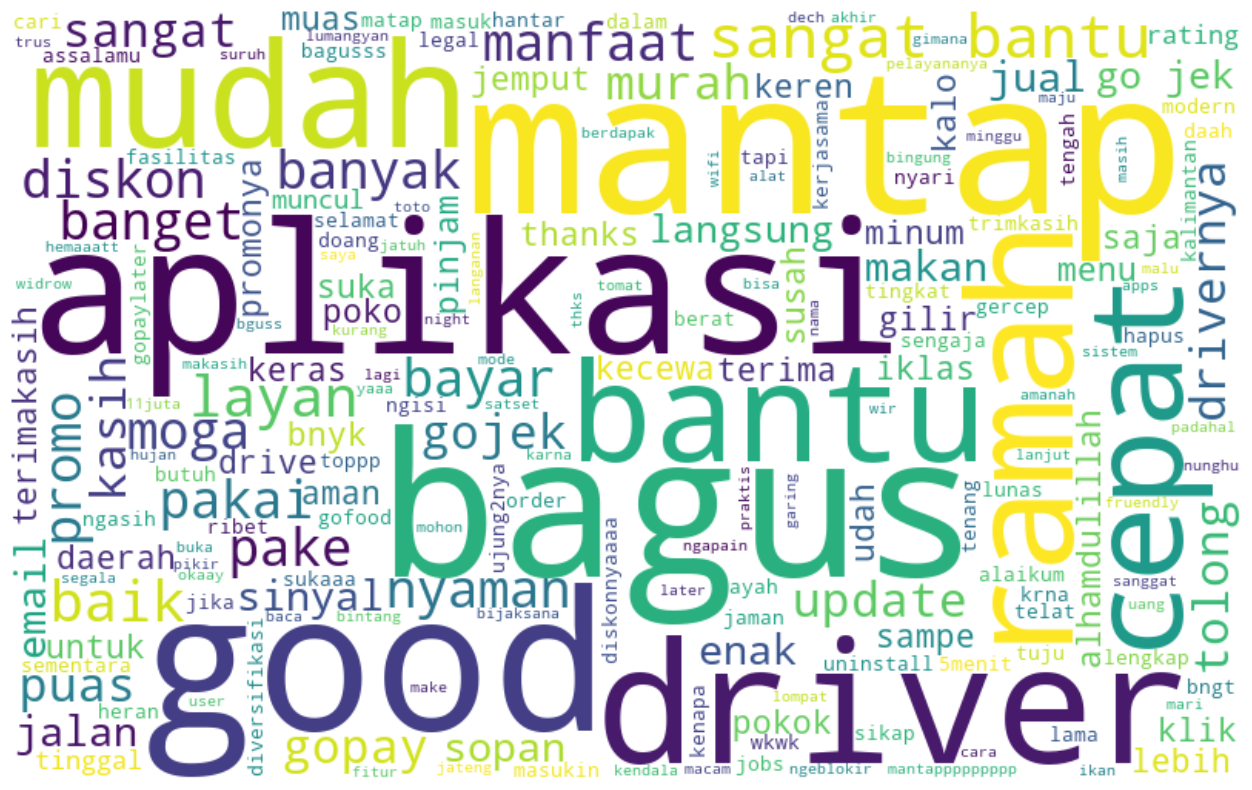

In [23]:
df_p=df[df['sentiment']=='Positif']
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

print("Citraan Visual Kata dalam Sentimen Positif")

Citraan Visual Kata dalam Sentimen Netral


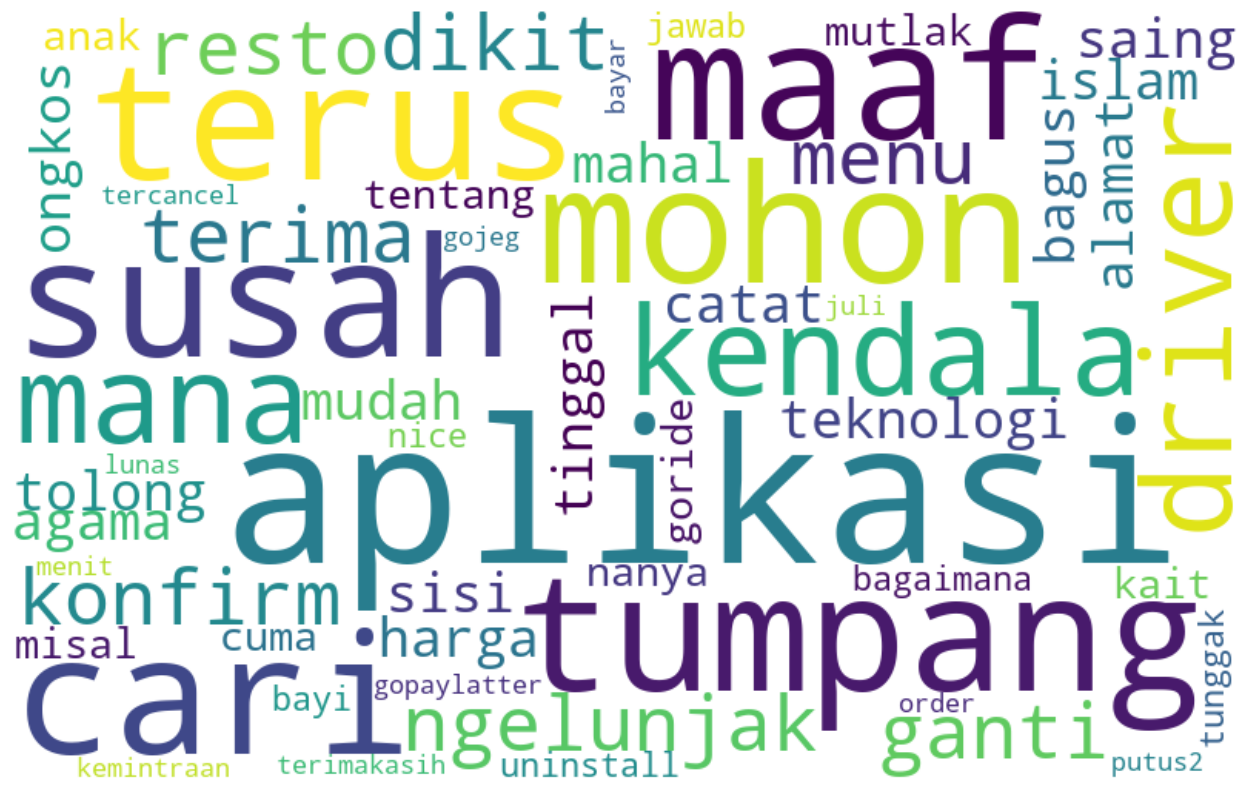

In [24]:
df_neg=df[df['sentiment']=='Netral']
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

print("Citraan Visual Kata dalam Sentimen Netral")

Citraan Visual Kata dalam Sentimen Negatif


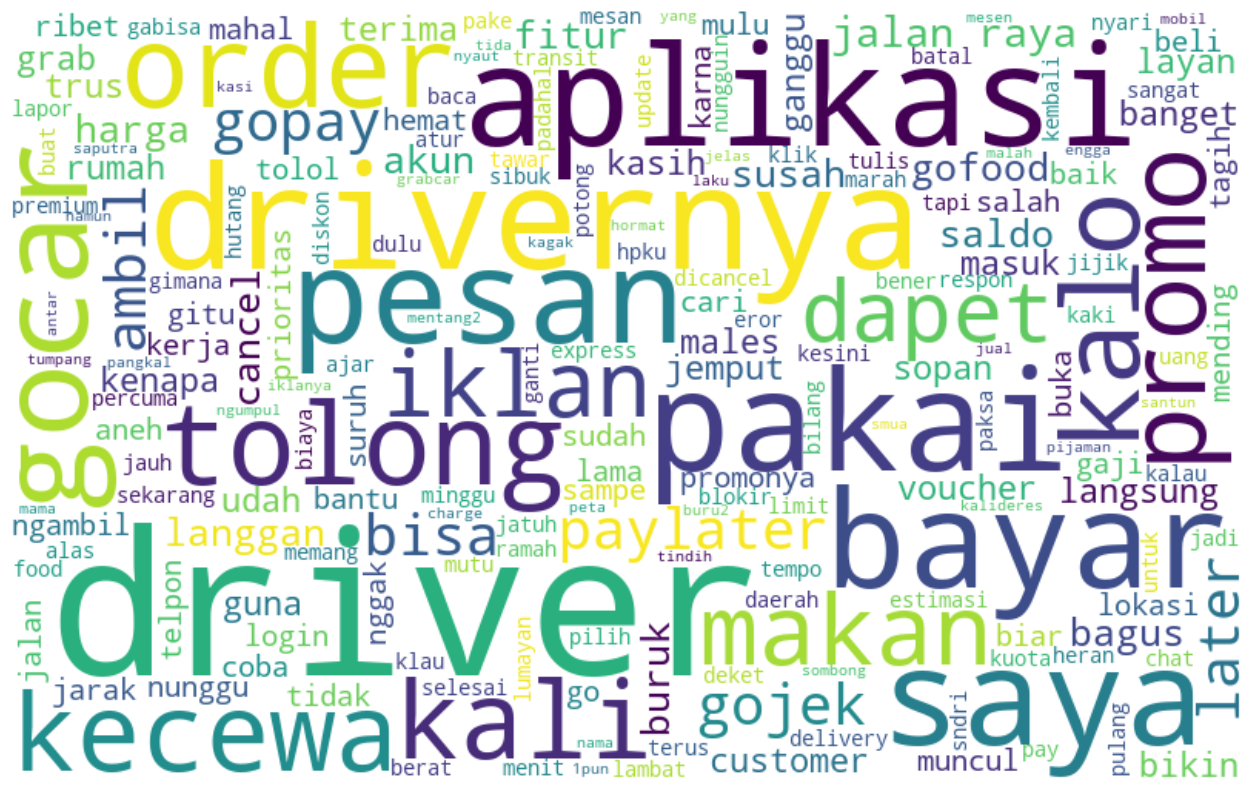

In [25]:
df_net=df[df['sentiment']=='Negatif']
all_words_lemnet = ' '.join([word for word in df_net['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemnet)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

print("Citraan Visual Kata dalam Sentimen Negatif")

# Impor Paket yng diperlukan untuk Training & Tes

In [27]:
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, precision_score, recall_score, f1_score # Performance Metricsfrom sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
X = df['text_string']
y = df['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [29]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

# Train & Tes Algoritma Random Forest, SVM & Naive Bayes

In [31]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf1 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm1 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb1 = accuracy_score(nb_prediction,y_test)

In [32]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf2 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm2 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb2 = accuracy_score(nb_prediction,y_test)

In [33]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.3,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf3 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm3 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb3 = accuracy_score(nb_prediction,y_test)

In [34]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.4,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf4 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm4 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb4 = accuracy_score(nb_prediction,y_test)

In [35]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.5,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf5 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm5 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb5 = accuracy_score(nb_prediction,y_test)

In [36]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.6,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf6 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm6 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb6 = accuracy_score(nb_prediction,y_test)

In [37]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.7,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf7 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm7 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb7 = accuracy_score(nb_prediction,y_test)

In [38]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.8,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf8 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm8 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb8 = accuracy_score(nb_prediction,y_test)

In [39]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.9,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
rf9 = accuracy_score(random_forest_classifier_prediction,y_test)

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
svm9 = accuracy_score(svm_prediction,y_test)

nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
nb9 = accuracy_score(nb_prediction,y_test)

# Hasil Train & Tes Akurasi Algoritma

In [41]:
# initialize list of lists
data_akurasi = [[90,10,(rf1*100),(svm1*100),(nb1*100)], [80,20,(rf2*100),(svm2*100),(nb2*100)],[70,30,(rf3*100),(svm3*100),(nb3*100)],[60,40,(rf4*100),(svm4*100),(nb4*100)],[50,50,(rf5*100),(svm5*100),(nb5*100)],[40,60,(rf6*100),(svm6*100),(nb6*100)],[30,70,(rf7*100),(svm7*100),(nb7*100)],[20,80,(rf8*100),(svm8*100),(nb8*100)],[10,90,(rf9*100),(svm9*100),(nb9*100)]]
        
# Create the pandas DataFrame
df_akurasi = pd.DataFrame(data_akurasi, columns=['data_train', 'data_tes', 'random_fores', 'SVM', 'naive_bayes'])
  
# print dataframe.
df_akurasi

,data_train,data_tes,random_fores,SVM,naive_bayes
0,90,10,78.333333,83.333333,80.000000
1,80,20,84.873950,89.075630,82.352941
2,70,30,91.011236,89.325843,86.516854
3,60,40,86.919831,88.185654,86.919831
4,50,50,86.148649,82.432432,85.135135
5,40,60,83.943662,80.845070,74.366197
6,30,70,80.917874,84.057971,68.115942
7,20,80,75.687104,80.126850,64.693446
8,10,90,62.969925,66.353383,45.676692


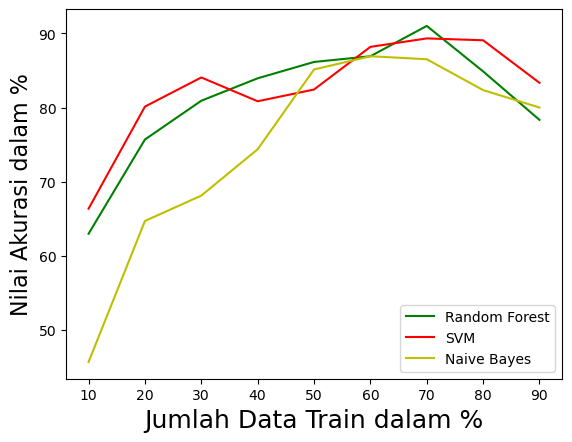

In [42]:
plt.plot(df_akurasi['data_train'], df_akurasi['random_fores'], 'g', label='Random Forest')
plt.plot(df_akurasi['data_train'], df_akurasi['SVM'], 'r', label='SVM')
plt.plot(df_akurasi['data_train'], df_akurasi['naive_bayes'], 'y', label='Naive Bayes')
plt.xlabel('Jumlah Data Train dalam %', fontsize=18)
plt.ylabel('Nilai Akurasi dalam %', fontsize=16)
plt.legend()
plt.show()

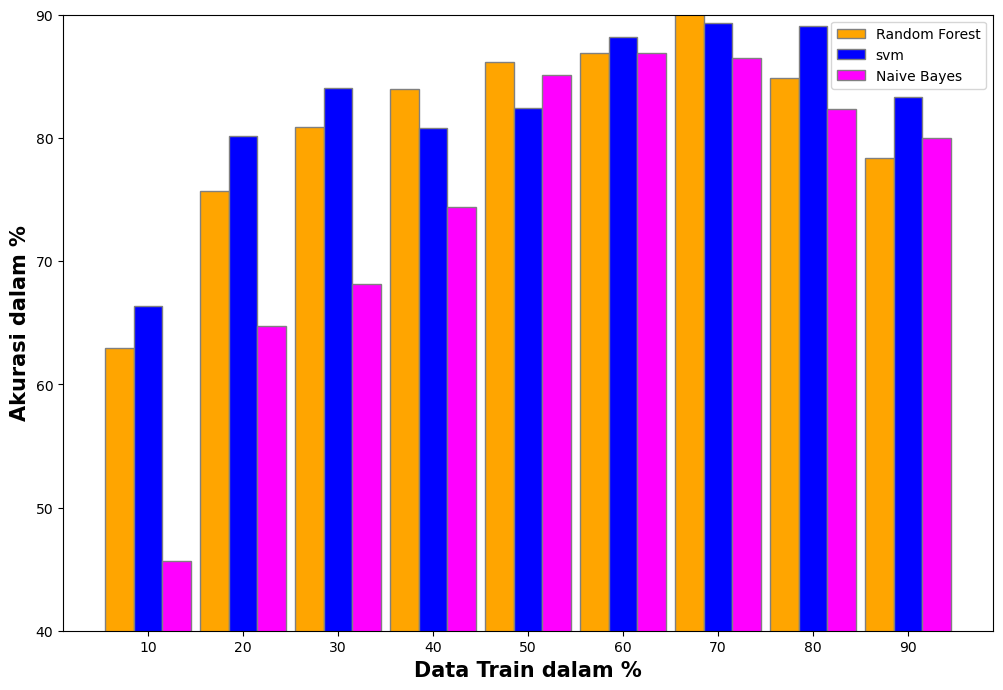

In [43]:
#sorting berdasarkan data train ascending
df_akurasi = df_akurasi.sort_values(by='data_train', ascending=True)
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]
# Set position of bar on X axis
br1 = np.arange(len(df_akurasi['random_fores']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, df_akurasi['random_fores'], color ='orange', width = barWidth,
  edgecolor ='grey', label ='Random Forest')
plt.bar(br2, df_akurasi['SVM'], color ='b', width = barWidth,
  edgecolor ='grey', label ='svm')
plt.bar(br3, df_akurasi['naive_bayes'], color ='magenta', width = barWidth,
  edgecolor ='grey', label ='Naive Bayes')
plt.ylim(40, 90)
# Adding Xticks
plt.xlabel('Data Train dalam %', fontweight ='bold', fontsize = 15)
plt.ylabel('Akurasi dalam %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(df_akurasi['random_fores']))],
  df_akurasi['data_train'])
plt.legend()
plt.show()

In [44]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=3)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

print("Algoritma Rain Forest")
print('')
print("RandomForestClassifier Accuracy:", accuracy_score(y_test,random_forest_classifier_prediction))
print("RandomForestClassifier Precision:", precision_score(y_test,random_forest_classifier_prediction, average="weighted"))
print("RandomForestClassifier Recall:", recall_score(y_test,random_forest_classifier_prediction, average="weighted"))
print("RandomForestClassifier f1_score:", f1_score(y_test,random_forest_classifier_prediction, average="weighted"))

print('')
print(f'confusion_matrix:\n {confusion_matrix(y_test, random_forest_classifier_prediction)}')
print('')
print(classification_report(y_test, random_forest_classifier_prediction))

svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)


print('====================================================\n')
print("Algoritma Support Vector Machine")
print('')
print("SVC Accuracy:", accuracy_score(y_test,svm_prediction))
print("SVC Precision:", precision_score(y_test,svm_prediction, average="weighted"))
print("SVC Recall:", recall_score(y_test,svm_prediction, average="weighted"))
print("SVC f1_score:", f1_score(y_test,svm_prediction, average="weighted"))


print('')
print(f'confusion_matrix:\n {confusion_matrix(y_test, svm_prediction)}')
print('')
print(classification_report(y_test, svm_prediction, zero_division=0))


nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
print('====================================================\n')
print("Algoritma Naive Bayes")
print('')
print("MultinomialNB Accuracy:", accuracy_score(y_test,nb_prediction))
print("MultinomialNB Precision:", precision_score(y_test,nb_prediction, average="weighted"))
print("MultinomialNB Recall:", recall_score(y_test,nb_prediction, average="weighted"))
print("MultinomialNB f1_score:", f1_score(y_test,nb_prediction, average="weighted"))

print('')
print(f'confusion_matrix:\n {confusion_matrix(y_test, nb_prediction)}')
print('')
print(classification_report(y_test, nb_prediction, zero_division=0))

Algoritma Rain Forest

RandomForestClassifier Accuracy: 0.8571428571428571
RandomForestClassifier Precision: 0.8608193277310925
RandomForestClassifier Recall: 0.8571428571428571
RandomForestClassifier f1_score: 0.8574675460414831

confusion_matrix:
 [[26  0  9]
 [ 0 32  2]
 [ 6  0 44]]

              precision    recall  f1-score   support

     Negatif       0.81      0.74      0.78        35
      Netral       1.00      0.94      0.97        34
     Positif       0.80      0.88      0.84        50

    accuracy                           0.86       119
   macro avg       0.87      0.85      0.86       119
weighted avg       0.86      0.86      0.86       119


Algoritma Support Vector Machine

SVC Accuracy: 0.8907563025210085
SVC Precision: 0.8904267589388697
SVC Recall: 0.8907563025210085
SVC f1_score: 0.8905054919083432

confusion_matrix:
 [[28  0  7]
 [ 0 34  0]
 [ 6  0 44]]

              precision    recall  f1-score   support

     Negatif       0.82      0.80      0.81        3